In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
dfcreation = pd.read_csv(filepath_or_buffer = './TABLE_CREATION_VF.csv')

In [36]:
dfdefaut = pd.read_csv(filepath_or_buffer = './TABLE_DEFAUT_VF.csv')

In [37]:
dfpib = pd.read_csv(filepath_or_buffer = './TABLE_PIB_CLEAN.csv')

In [38]:
dfchomage = pd.read_csv(filepath_or_buffer = './TABLE_CHOMAGE_VF.csv')

In [39]:
print(dfchomage.columns)

Index(['Code', 'Libellé', 'trimestre', 'chomage'], dtype='object')


In [40]:
print(dfpib.columns)

Index(['Région', 'Année', 'PIB_VAL', 'PIB_VOL', 'PIB_HAB', 'PIB_EMP'], dtype='object')


**Création de correspondance entre le code région et le libellé de région dans la data de PIB**

In [41]:
dfpib['Région'] = dfpib['Région'].str.upper()
mapping_df = dfchomage[['Code', 'Libellé']].drop_duplicates()
mapping_df['Libellé'] = mapping_df['Libellé'].str.upper()
mapping_df = mapping_df.merge(dfpib[['Région', 'Année', 'PIB_VAL', 'PIB_VOL', 'PIB_HAB', 'PIB_EMP']], 
                              how='left', left_on='Libellé', right_on='Région')
dfchomage = dfchomage.merge(mapping_df[['Code', 'Libellé', 'Année', 'PIB_VAL', 'PIB_VOL', 'PIB_HAB', 'PIB_EMP']], 
                            on=['Code', 'Libellé'], how='left')



In [42]:
print(dfchomage.columns)

Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')


In [43]:
print(dfcreation.columns)

Index(['Secteur', 'trimestre', 'code_region', 'code_dep', 'nombre_creation',
       'Quartile_MOY', 'Quartile_CV'],
      dtype='object')


In [44]:
#dfcreation[annee] = 
#dfcreation = dfcreation.rename(columns={'trimestre': 'annee'})

In [45]:
print(dfdefaut.columns)

Index(['Secteur', 'trimestre', 'code_region', 'code_dep', 'nombre_defaut'], dtype='object')


In [46]:
region_code = 1
dfcreation1 = dfcreation[dfcreation['code_region'] == region_code]
dfcreation1.sort_values('trimestre', inplace=True)

dfdefaut1 = dfdefaut[dfdefaut['code_region'] == region_code]
dfdefaut1.sort_values('trimestre', inplace=True)

dfchomage1 = dfchomage[dfchomage['Code'] == region_code]
dfchomage1.sort_values('trimestre', inplace=True)



/tmp/ipykernel_3550/657482980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_3550/657482980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdefaut1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_3550/657482980.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)


In [47]:
annual_creation_sum = dfcreation1.groupby(['trimestre', 'code_region'])['nombre_creation'].sum().reset_index()
annual_creation_sum.head()
annual_defaut_sum = dfdefaut1.groupby(['trimestre', 'code_region'])['nombre_defaut'].sum().reset_index()
chomage_sum = dfchomage1.groupby(['trimestre', 'Code'])['chomage'].sum().reset_index()

In [48]:
annual_creation_sum.tail()

,trimestre,code_region,nombre_creation
0,2017,1,5244
1,2018,1,5701
2,2019,1,6369
3,2020,1,6345
4,2021,1,7623


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


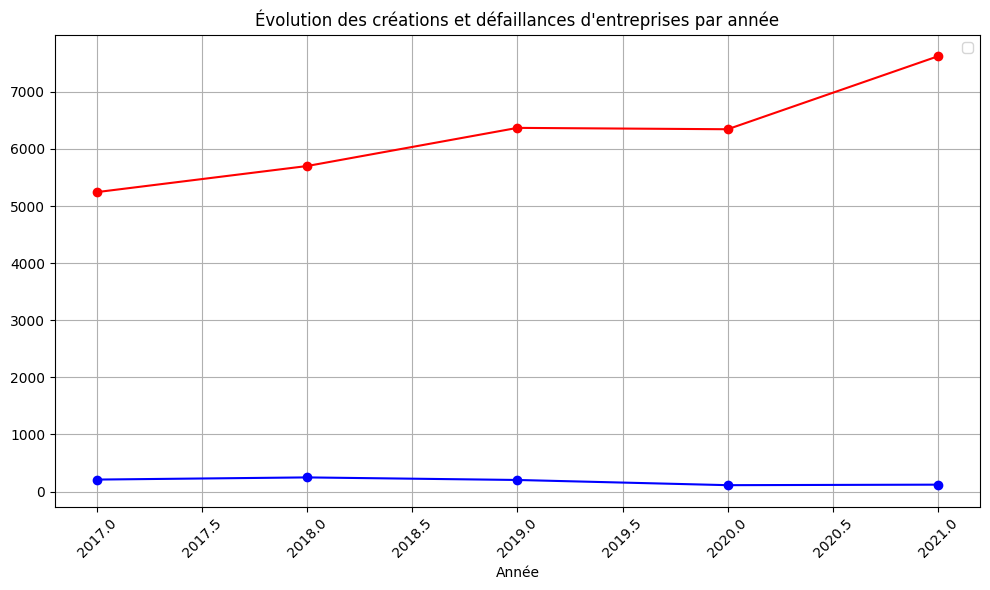

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(annual_creation_sum['trimestre'], annual_creation_sum['nombre_creation'], marker='o', linestyle='-', color= 'red')
plt.plot(annual_defaut_sum['trimestre'], annual_defaut_sum['nombre_defaut'], marker='o', linestyle='-', color='blue')
plt.title("Évolution des créations et défaillances d'entreprises par année")
plt.xlabel("Année")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

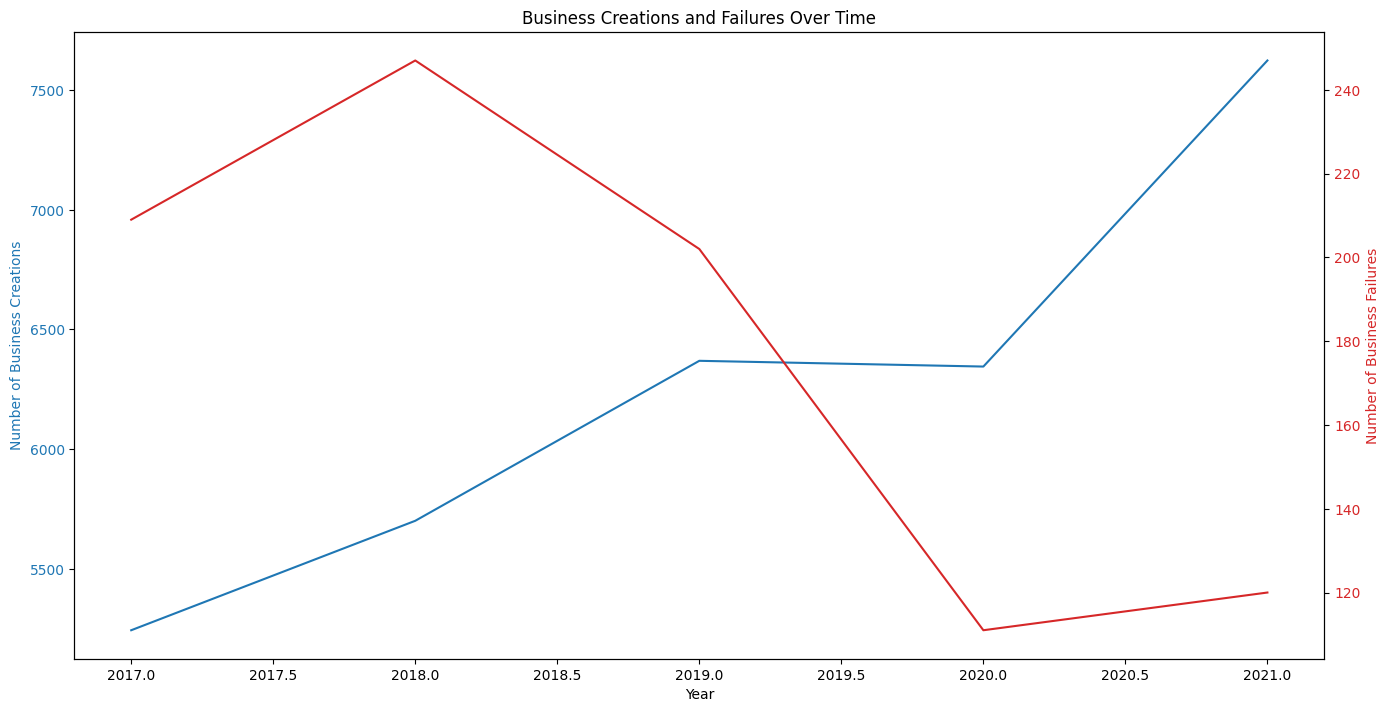

In [50]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot business creations
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Business Creations', color=color)
ax1.plot(annual_creation_sum['trimestre'], annual_creation_sum['nombre_creation'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for business failures
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot business failures
color = 'tab:red'
ax2.set_ylabel('Number of Business Failures', color=color)  # we already handled the x-label with ax1
ax2.plot(annual_defaut_sum['trimestre'], annual_defaut_sum['nombre_defaut'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Business Creations and Failures Over Time")


plt.show()

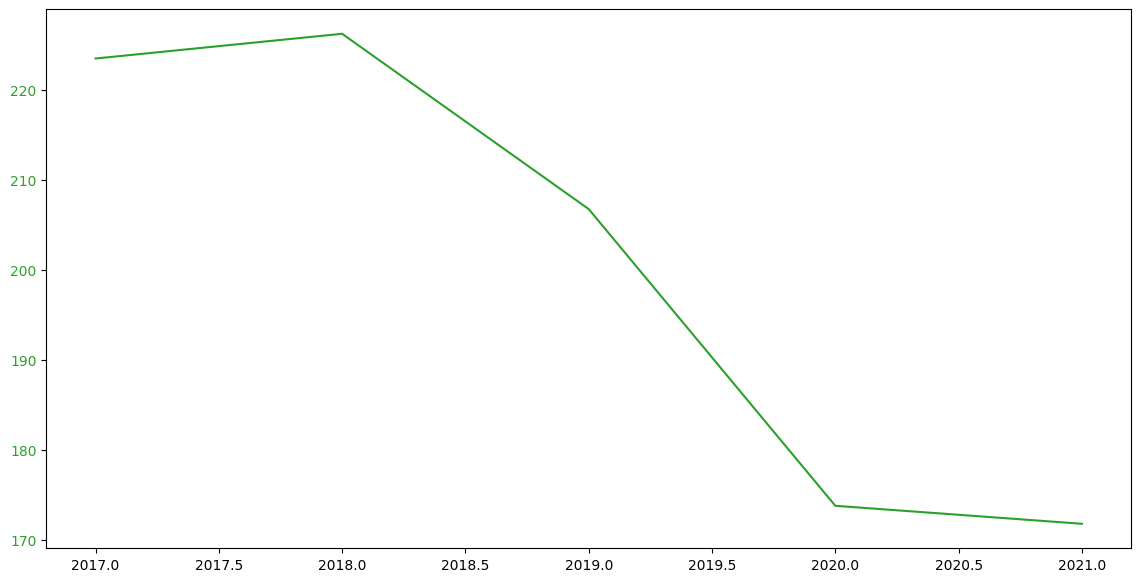

In [51]:
ax3 = ax1.twinx() 
fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'tab:green'
ax3.set_ylabel('Chomage', color=color)
ax1.plot(chomage_sum['trimestre'], chomage_sum['chomage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

/tmp/ipykernel_3550/893623225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_3550/893623225.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdefaut1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_3550/893623225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_3550/893623225.py:7: Setti

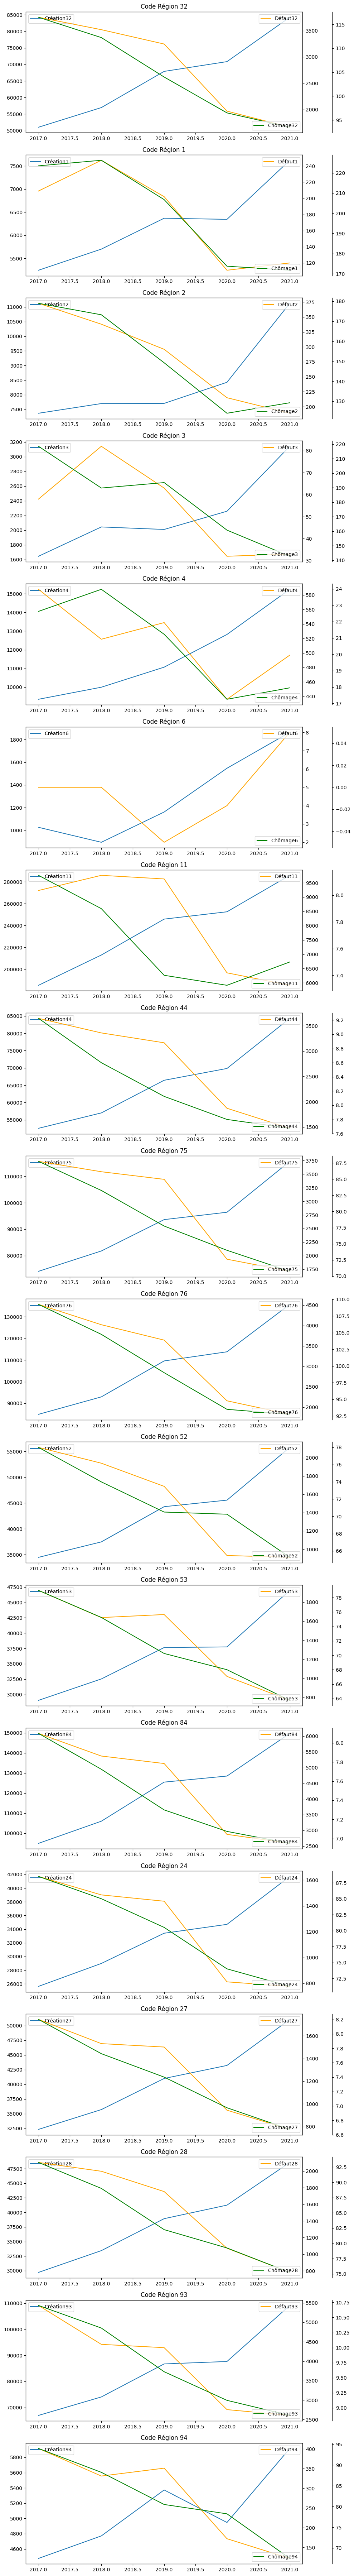

In [52]:
liste = set(dfcreation['code_region'])
num_subplots = len(liste)
fig, axs = plt.subplots(num_subplots, 1, figsize=(10, 4*num_subplots))
for i, j in enumerate(liste):
    region_code = j
    dfcreation1 = dfcreation[dfcreation['code_region'] == region_code]
    dfcreation1.sort_values('trimestre', inplace=True)
    annual_creation_sum = dfcreation1.groupby(['trimestre', 'code_region'])['nombre_creation'].sum().reset_index()
    dfdefaut1 = dfdefaut[dfdefaut['code_region'] == region_code]
    dfdefaut1.sort_values('trimestre', inplace=True)
    annual_defaut_sum = dfdefaut1.groupby(['trimestre', 'code_region'])['nombre_defaut'].sum().reset_index()
    dfchomage1 = dfchomage[dfchomage['Code'] == region_code]
    dfchomage1.sort_values('trimestre', inplace=True)
    chomage_sum = dfchomage1.groupby(['trimestre', 'Code'])['chomage'].sum().reset_index()
    ax1 = axs[i].twinx()
    ax2 = axs[i].twinx()
    ax2.spines['right'].set_position(('outward', 60))
    axs[i].plot(annual_creation_sum['trimestre'], annual_creation_sum['nombre_creation'], label=f'Création{j}')
    ax1.plot(annual_defaut_sum['trimestre'], annual_defaut_sum['nombre_defaut'], label=f'Défaut{j}', color='orange')
    ax2.plot(chomage_sum['trimestre'], chomage_sum['chomage'], label=f'Chômage{j}', color='green')
    axs[i].legend(loc='upper left')
    ax1.legend(loc='upper right')
    ax2.legend(loc='lower right')
    axs[i].set_title(f'Code Région {region_code}')
plt.tight_layout()
plt.show()
#Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL', 'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],  dtype='object')